__Libraries__

In [1]:
# Path tools
import sys,os
sys.path.append(os.path.join("..")) # adding home directory to sys path so we can import the utility function

# Neural networks with numpy
from utils.neuralnetwork import NeuralNetwork 

# Sklearn - machine learning tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util

import pandas as pd
import matplotlib.pyplot as plt

__Building Logistic Regression Classifier__

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
# Create a subset
subset_X = X[:1000]
subset_y = y[:1000]

In [4]:
subset_X = np.array(subset_X)
subset_y = np.array(subset_y)

__Create training and test data__

In [5]:
X_train, X_test, y_train, y_test = train_test_split(subset_X, 
                                                    subset_y,
                                                    random_state=9,
                                                    train_size=0.8, # argparse - make this the default
                                                    test_size=0.2) # argparse - make this the default

__Min-max regularization__

In [6]:
X_train_scaled = (X_train - X_train.min())/(X_train.max() - X_train.min())
X_test_scaled = (X_test - X_test.min())/(X_test.max() - X_test.min())

__Train Logistic Regression Classifier__

In [7]:
clf = LogisticRegression(penalty='none', 
                         tol=0.1,
                         solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

__Evaluate__

In [8]:
# Predictions for scaled dat
y_pred = clf.predict(X_test_scaled)

In [9]:
# Classification metrics
classification_metrics = metrics.classification_report(y_test, y_pred)
print(classification_metrics) # Print in terminal

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.72      0.90      0.80        20
           2       0.84      0.84      0.84        25
           3       0.71      0.89      0.79        19
           4       1.00      0.87      0.93        23
           5       0.88      0.65      0.75        23
           6       0.84      1.00      0.91        16
           7       0.78      0.74      0.76        19
           8       0.75      0.80      0.77        15
           9       0.89      0.76      0.82        21

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.85      0.83      0.84       200



In [10]:
classification_metrics_df = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict = True)).transpose()

In [11]:
#path = os.path.join("..", "out", "lr_classification_metrics.csv")
classification_metrics_df.to_csv("lr_classification_metrics.csv")

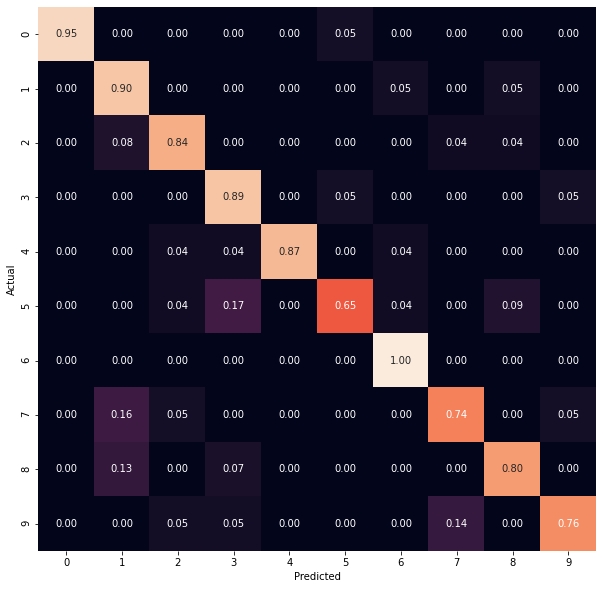

In [12]:
# Create confusion matrix and save in output folder
confusion_matrix = clf_util.plot_cm(y_test, y_pred, normalized=True)
#plt.savefig("confusion_matrix.png", dpi = 300, bbox_inches = "tight")

Add "Test on new data" here

## Neural Network

In [13]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(subset_X, 
                                                    subset_y,
                                                    random_state=9,
                                                    train_size=0.8, # argparse - make this the default
                                                    test_size=0.2)

In [16]:
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test) 

In [17]:
nn = NeuralNetwork([X_train.shape[1], 32, 16, 10])

In [18]:
print(f"[INFO] {nn}")
nn.fit(X_train, y_train, epochs=1000)

../utils/neuralnetwork.py:31: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))


[INFO] epoch=1, loss=357.5643843
[INFO] epoch=100, loss=311.1951766
[INFO] epoch=200, loss=309.7864294
[INFO] epoch=300, loss=309.1247867
[INFO] epoch=400, loss=308.5417872
[INFO] epoch=500, loss=308.0476168
[INFO] epoch=600, loss=307.7069090
[INFO] epoch=700, loss=307.4636159
[INFO] epoch=800, loss=307.2634880
[INFO] epoch=900, loss=307.0980005
[INFO] epoch=1000, loss=306.9525236


__Evaluating model__

In [22]:
print(["[INFO] evaluating network..."])
predictions = nn.predict(X_test)
predictions = predictions.argmax(axis=1)
classification_report_nn = pd.DataFrame(classification_report(y_test.argmax(axis=1), predictions, output_dict = True)).transpose()
print(classification_report(y_test.argmax(axis=1), predictions))

['[INFO] evaluating network...']
              precision    recall  f1-score   support

           0       0.14      0.95      0.24        19
           1       0.51      0.95      0.67        20
           2       0.00      0.00      0.00        25
           3       0.50      0.05      0.10        19
           4       1.00      0.04      0.08        23
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        16
           7       0.20      0.32      0.24        19
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        21

    accuracy                           0.23       200
   macro avg       0.24      0.23      0.13       200
weighted avg       0.25      0.23      0.13       200



../utils/neuralnetwork.py:31: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))
/home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [23]:
classification_report_nn.to_csv("nn_classification_metrics.csv")